C:\Users\HARISH\AppData\Local\Temp\ipykernel_28472\261998475.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\HARISH\Downloads\archive\accident.csv", index_col=0, parse_dates=True)


Using column: Survived
Total Cases: 51
Total Survivors: 26
Overall Survival Rate: 50.98%

Daily Survival Rate:
1970-01-01    50.980392
Name: Survived, dtype: float64

Rolling Mean Survival Rate (7-Day):
Age
1970-01-01 00:00:00.000000018    42.857143
1970-01-01 00:00:00.000000022    28.571429
1970-01-01 00:00:00.000000030    28.571429
1970-01-01 00:00:00.000000049    28.571429
1970-01-01 00:00:00.000000066    14.285714
Name: Rolling_Mean, dtype: float64

Survival Probability Distribution:
Survived
1    50.980392
0    49.019608
Name: proportion, dtype: float64


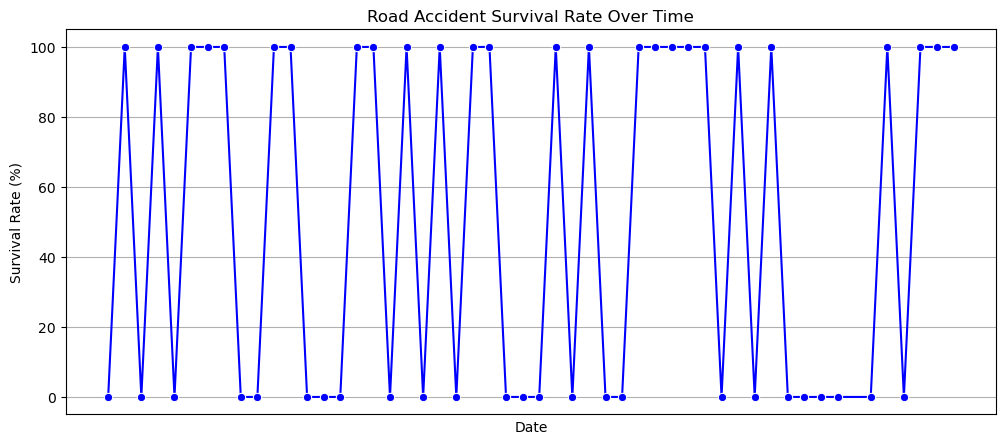

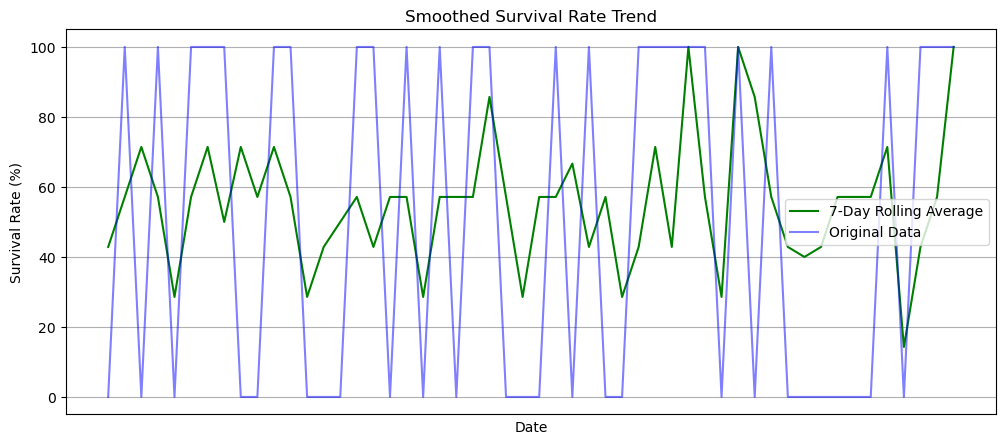

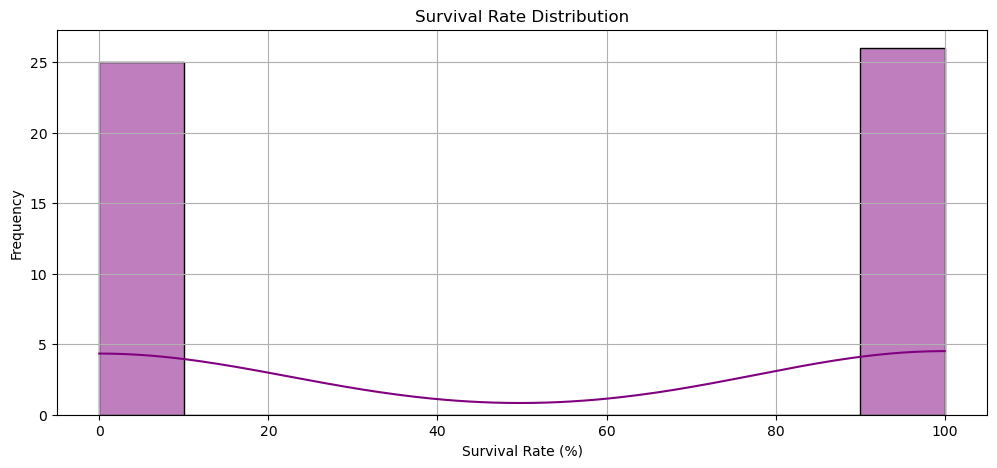

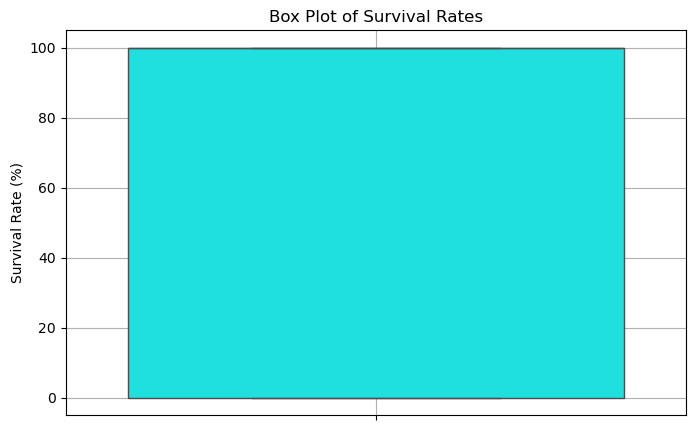

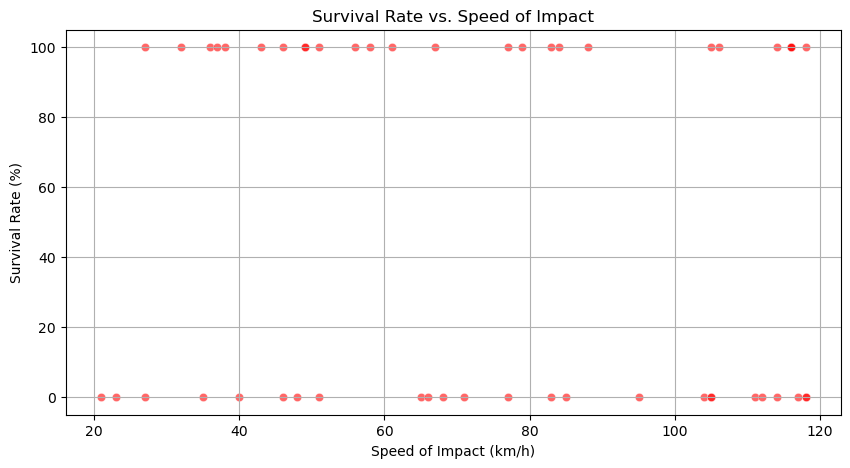

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\HARISH\Downloads\archive\accident.csv", index_col=0, parse_dates=True)

# Ensure datetime parsing and remove invalid/missing values
df.index = pd.to_datetime(df.index, errors='coerce')
df.dropna(inplace=True)
df = df[~df.index.duplicated(keep='first')]  # Remove duplicate index values

# Select survival-related column
survival_col = next((col for col in df.columns if 'survived' in col.lower()), None)
if not survival_col:
    raise KeyError(f"No 'Survived' column found. Available: {df.columns}")

print(f"Using column: {survival_col}")

# **Overall Survival Rate Calculation**
total_cases = len(df)  # Total number of rows
survived_cases = df[survival_col].sum()  # Number of survivors (1 means survived, 0 means did not survive)
overall_survival_rate = (survived_cases / total_cases) * 100  # Calculate survival rate percentage

# Print total cases and survival rate calculation
print(f"Total Cases: {total_cases}")
print(f"Total Survivors: {survived_cases}")
print(f"Overall Survival Rate: {overall_survival_rate:.2f}%")

# **Calculate Survival Rate by Day**
daily_survival_rate = df.groupby(df.index.date)[survival_col].mean() * 100
print("\nDaily Survival Rate:")
print(daily_survival_rate)

# **Calculate Moving Average (Rolling Mean) for Survival Rate**
df["Rolling_Mean"] = df[survival_col].rolling(window=7, min_periods=1).mean() * 100  # 7-day rolling mean
print("\nRolling Mean Survival Rate (7-Day):")
print(df["Rolling_Mean"].tail())

# **Calculate Probability Distribution of Survival**
survival_distribution = df[survival_col].value_counts(normalize=True) * 100
print("\nSurvival Probability Distribution:")
print(survival_distribution)

# **🔹 Visualization 1: Line Plot (Survival Rate Over Time)**
plt.figure(figsize=(12, 5))
sns.lineplot(x=df.index, y=df[survival_col] * 100, marker="o", color="b")
plt.title("Road Accident Survival Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **🔹 Visualization 2: Rolling Mean (Trend Smoothing)**
plt.figure(figsize=(12, 5))
sns.lineplot(x=df.index, y=df["Rolling_Mean"], color="g", label="7-Day Rolling Average")
sns.lineplot(x=df.index, y=df[survival_col] * 100, color="b", alpha=0.5, label="Original Data")
plt.title("Smoothed Survival Rate Trend")
plt.xlabel("Date")
plt.ylabel("Survival Rate (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **🔹 Visualization 3: Histogram (Survival Probability Distribution)**
plt.figure(figsize=(12, 5))
sns.histplot(df[survival_col] * 100, bins=10, kde=True, color="purple")
plt.title("Survival Rate Distribution")
plt.xlabel("Survival Rate (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **🔹 Visualization 4: Box Plot (Survival Rate Distribution)**
plt.figure(figsize=(8, 5))
sns.boxplot(y=df[survival_col] * 100, color="cyan")
plt.title("Box Plot of Survival Rates")
plt.ylabel("Survival Rate (%)")
plt.grid(True)
plt.show()

# **🔹 Visualization 5: Scatter Plot (Survival Rate vs. Impact Speed)**
if 'Speed_of_Impact' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df['Speed_of_Impact'], y=df[survival_col] * 100, alpha=0.6, color="red")
    plt.title("Survival Rate vs. Speed of Impact")
    plt.xlabel("Speed of Impact (km/h)")
    plt.ylabel("Survival Rate (%)")
    plt.grid(True)
    plt.show()
else:
    print("Column 'Speed_of_Impact' not found, skipping scatter plot.")
